In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.drop(columns = ['Unnamed: 0', 'key'], inplace=True)

In [6]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.isna().sum()

df.dropna(how='any', inplace=True)

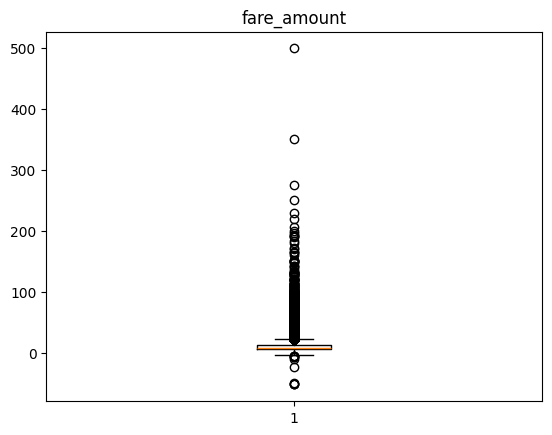

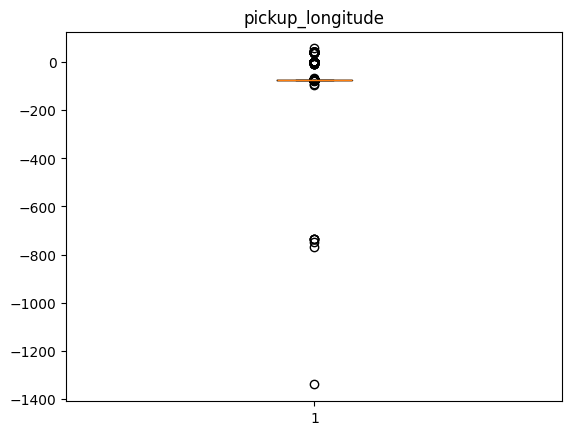

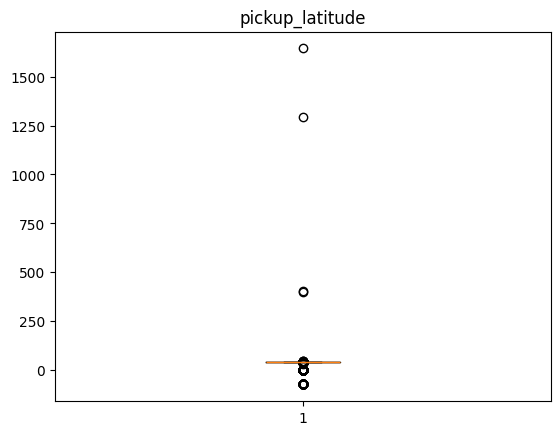

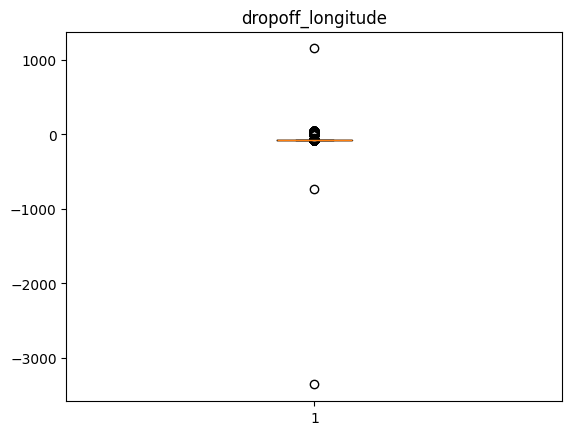

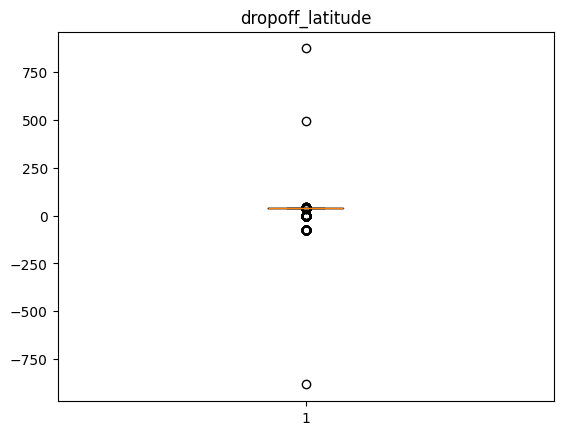

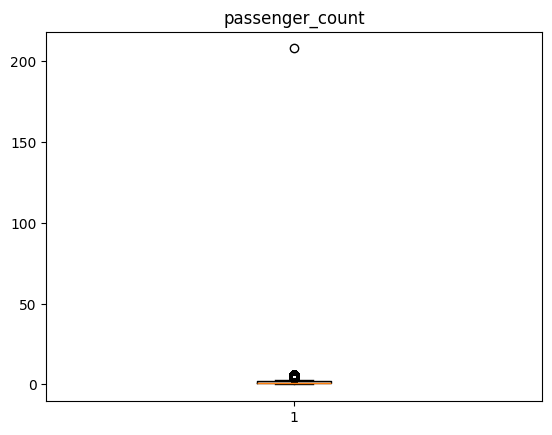

In [8]:
for col in df.select_dtypes(exclude=['object']):
    plt.figure()
    plt.title(col)
    plt.boxplot(data=df, x=col)

In [9]:
df = df[ 
    (df.pickup_latitude > -90) & (df.pickup_latitude < 90) & 
    (df.dropoff_latitude > -180) & (df.dropoff_latitude < 180) & 
    (df.pickup_longitude > -90) & (df.pickup_longitude < 90) & 
    (df.dropoff_longitude > -180) & (df.dropoff_longitude < 180) & 
    (df.fare_amount > 0) & (df.fare_amount < 2000) & 
    (df.passenger_count > 0)
]

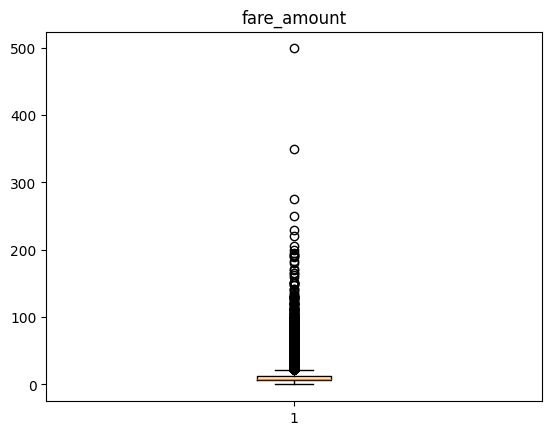

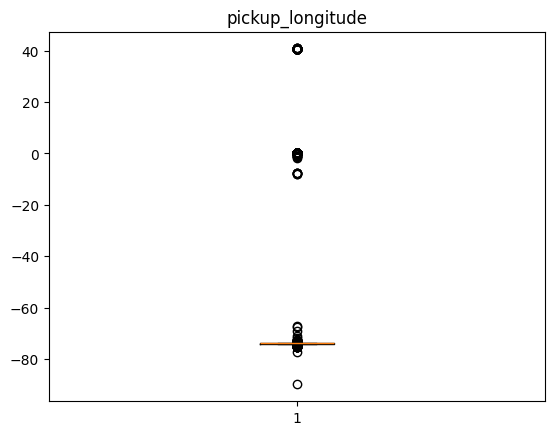

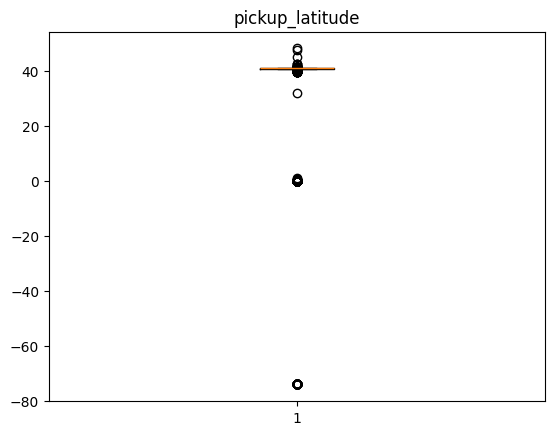

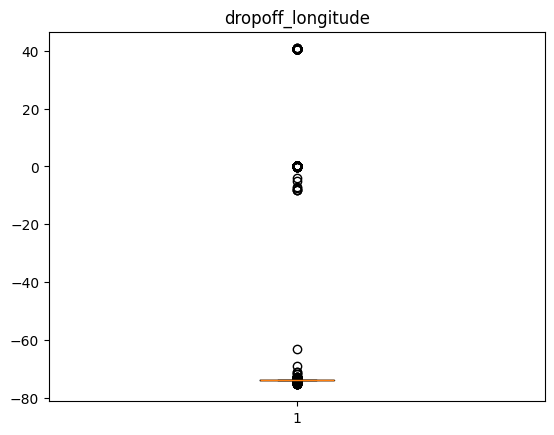

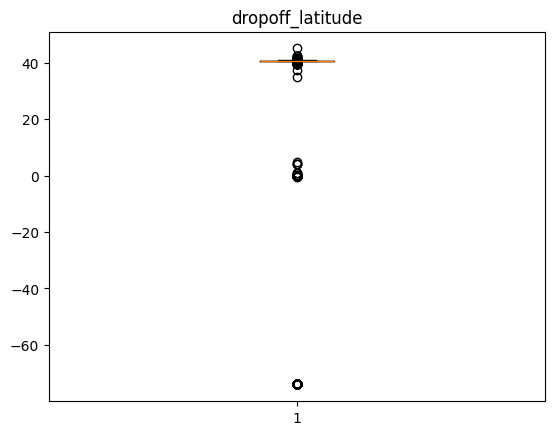

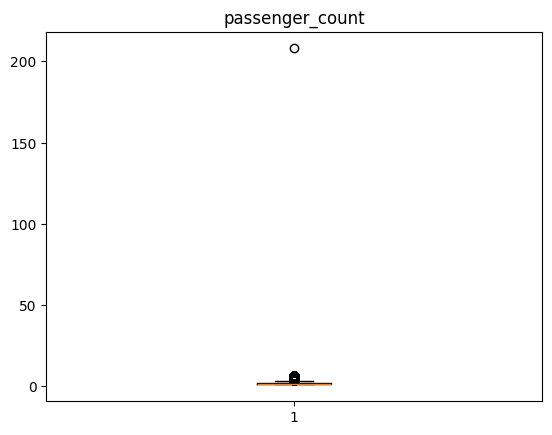

In [10]:
for col in df.select_dtypes(exclude=['object']):
    plt.figure()
    plt.title(col)
    plt.boxplot(data=df, x=col)

In [11]:
from math import sin, cos, asin

def distance(lat1, lon1, lat2, lon2):
    lat1, lat2, lon1, lon2 = map(np.radians, [lat1, lat2, lon1, lon2])

    latdiff = abs( lat2 - lat1 )
    londiff = abs( lon2 - lon1 )

    km = 2 * 6371 * np.arcsin( np.sqrt(
        np.sin(latdiff / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) + np.sin(londiff / 2.0) ** 2
    ) )

    return km





In [12]:
temp = distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
temp

C:\Users\Aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         10956.973413
1         10955.085406
2         10951.210142
3         10942.226605
4         10952.109649
              ...     
199995    10954.961535
199996    10955.318609
199997    10958.378718
199998    10961.499550
199999    10953.937875
Length: 199256, dtype: float64

In [13]:
df['distance'] = temp

In [14]:


df.columns



Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance'],
      dtype='object')

In [15]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [16]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
distance                         float64
dtype: object

In [17]:
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour

In [18]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,weekday,year,month,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,10956.973413,Thursday,2015,5,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,10955.085406,Friday,2009,7,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,10951.210142,Monday,2009,8,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,10942.226605,Friday,2009,6,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,10952.109649,Thursday,2014,8,17


In [19]:
df = df.drop(columns=['pickup_datetime', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

In [20]:
df.head()

,fare_amount,passenger_count,distance,weekday,year,month,hour
0,7.5,1,10956.973413,Thursday,2015,5,19
1,7.7,1,10955.085406,Friday,2009,7,20
2,12.9,1,10951.210142,Monday,2009,8,21
3,5.3,3,10942.226605,Friday,2009,6,8
4,16.0,5,10952.109649,Thursday,2014,8,17


In [21]:
def convert_weekday(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday']:
        return 0
    else:
        return 1

df['weekday'] = df['weekday'].apply(convert_weekday)

In [22]:
df.head()

,fare_amount,passenger_count,distance,weekday,year,month,hour
0,7.5,1,10956.973413,0,2015,5,19
1,7.7,1,10955.085406,1,2009,7,20
2,12.9,1,10951.210142,0,2009,8,21
3,5.3,3,10942.226605,1,2009,6,8
4,16.0,5,10952.109649,0,2014,8,17


In [25]:
df.isna().sum()

fare_amount        0
passenger_count    0
distance           0
weekday            0
year               0
month              0
hour               0
dtype: int64

In [26]:
df.dropna(how='any', inplace=True)

In [27]:
x = df.loc[:, df.columns.values != 'fare_amount']
y = df['fare_amount']

In [28]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)



In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def fit_predict(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    print(f"Mean squared error : {mean_squared_error(ytest, ypred, squared=False)}")
    print(f"Mean absolute error : {mean_absolute_error(ytest, ypred)}")
    print(f"R2 Score : {r2_score(ytest, ypred)}")
    
    
    

In [34]:
x.isna().sum()


passenger_count    0
distance           0
weekday            0
year               0
month              0
hour               0
dtype: int64

In [35]:
from sklearn.linear_model import LinearRegression
fit_predict(LinearRegression())

Mean squared error : 9.881075827228424
Mean absolute error : 6.003908569128371
R2 Score : 0.01681157440527492


C:\Users\Aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
from sklearn.ensemble import RandomForestRegressor
fit_predict(RandomForestRegressor())

Mean squared error : 9.245446934808296
Mean absolute error : 5.885803863055713
R2 Score : 0.13923596321456322


C:\Users\Aftab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
